In [33]:
#KNN

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split # Para dividir o dataset em treino e teste.
from sklearn.metrics import accuracy_score # Para testar a qualidade do modelo
from sklearn.preprocessing import StandardScaler # Caso seja preciso normalizar dados

In [35]:
#Passo 1: Gerar um random dataset
X = np.random.rand(100, 2) # 100 obs com 2 features cada
y = np.random.choice([0, 1], size=100) #100 obs com valores escolhidos de forma aleatória entre 0 e 1 (Outcome Binário)

In [36]:
#Passo 2: Deixar o utilizador escolher se quer que os dados sejam normalizados ou não.
normalize_data = input("Do you want to normalize the data? (yes/no): ").lower() == 'yes'

In [37]:
#Passo 3: Normalizar os dados caso a resposta anterior seja sim, usando uma if clause.
if normalize_data:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

In [38]:
#Passo 4: Dividir o dataset criado em treino e teste, com seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
#Passo 5: Implementar o algoritmo KNN, com o número de K escolhido pelo utilizador através de input.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2)) #Função para calcular distancia entre observações usando a euclidean distance.



def knn_predict(X_train, y_train, x_test, k): #Função de previsão com 4 parametros, trainset features, trainset labels, obs do test data para o qual queremos fazer a previsão, e número de vizinhos que pretendemos considerar (K)
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train] #Distancia entre o ponto x_test e cada ponto no training set.
    k_nearest_indices = np.argsort(distances)[:k] #Para ordenar as distancias de forma ascendente e seleccionar os primeiros K indices, que representam os vizinhos mais próximos
    k_nearest_labels = [y_train[i] for i in k_nearest_indices] #Da return aos labels correspondentes aos K vizinhos mais próximos
    predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count) #Determina o label previsto, sendo este o label mais frequente entre os k vizinhos usando a função max.
    return predicted_label # Label previsto para o nosso ponto.

#Perguntar ao utilizador o número de K pretendido para a função KNN.
k_value = int(input("Choose the number of K for KNN function: "))

In [40]:
#Passo 6: Fazer previsões com base no número de K vizinhos pretendido pelo utilizador

y_pred = [knn_predict(X_train, y_train, x_test, k_value) for x_test in X_test]

In [47]:
#Para testar com valores das variáveis X não presentes no dataset. Escolher os valores pretendidos para x dentro do np.array
new_data_point = np.array([[0.9, 0.3]]) #Se substituir 0.9 por 0.1, por exemplo, o modelo irá classificar a obs como 0 em vez de 1.
if normalize_data:
    new_data_point = scaler.transform(new_data_point)
new_prediction = knn_predict(X_train, y_train, new_data_point, k_value)
print(f"Predicted label for the new data point: {new_prediction}")

Predicted label for the new data point: 1


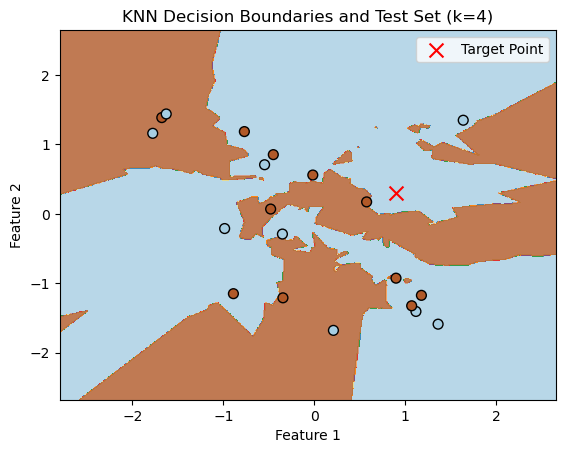

In [50]:
# Passo 8: Para visualizar um gráfico decision boundaries para a minha observação nova criada (0.9, 0.3). Neste caso, como 3 dos 4 vizinhos do meu target point estão na zona cinzenta, a minha obs será classificada como tal.
import matplotlib.pyplot as plt
x1_target, x2_target = 0.9, 0.3

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array([knn_predict(X_train, y_train, np.array([xi, yi]), k_value) for xi, yi in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 11), cmap=plt.cm.Paired)

# Scatter plot for test set
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)

# Highlight the specified point
plt.scatter(x1_target, x2_target, marker='x', color='red', s=100, label='Target Point')

plt.title(f'KNN Decision Boundaries and Test Set (k={k_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()